# Prerequisites

In [142]:
import os

# this is necessary for tensorflowjswizard
os.environ["TF_USE_LEGACY_KERAS"] = "1"

In [143]:
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np
import sentencepiece as spm
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping

In [144]:
from google.colab import drive
# drive.mount('/content/drive')

# you can obtain the model from https://www.kaggle.com/models/google/universal-sentence-encoder/tensorFlow1/lite
# pick the Tensorflow1 lite version model

use_model_path = '/content/drive/MyDrive/ndev-task-tracker/universal-sentence-encoder-tensorflow1-lite-v2'
use_model = hub.load(use_model_path)
sp = spm.SentencePieceProcessor()
sp.load(f"{use_model_path}/assets/universal_encoder_8k_spm.model")

True

# Dataset

## valid sentences

In [145]:
# might need to normalize the word "pr", "wip", or "lgtm"
# because USE are trained for general sentence not tech specific
valid_sentences = [
    "Write unit tests for the payment module",
    "Deploy the latest build to staging",
    "Review pull requests from the frontend team",
    "Document the API endpoints",
    "Fix the broken login functionality",
    "Set up CI/CD pipeline",
    "Refactor the user authentication flow",
    "Create onboarding guide for new developers",
    "Update the README with new instructions",
    "Optimize the database queries",
    "Design the landing page layout",
    "work on something",
    "Add dark mode support",
    "Test the email notification system",
    "Integrate analytics into the dashboard",
    "Conduct code review for recent commits",
    "Prepare slides for the sprint demo",
    "Set up the development environment",
    "Schedule a meeting with the design team",
    "Analyze user feedback from the last release",
    "Write a script to automate deployment",
    "Migrate data to the new schema",
    "Configure ESLint and Prettier",
    "Add loading states to the forms",
    "Check browser compatibility for Safari",
    "Verify translations on the login page",
    "Fix layout issues in mobile view",
    "Create a form validation hook",
    "Investigate slow page load times",
    "Create reusable button component",
    "Generate type definitions from OpenAPI",
    "Implement password reset flow",
    "Publish release notes",
    "Update dependencies using npm",
    "Write integration tests for checkout",
    "Resolve merge conflicts in feature branch",
    "Audit accessibility of the profile page",
    "Optimize images for faster loading",
    "Create mock data for local testing",
    "Develop onboarding email templates",
    "Verify API rate limiting",
    "Clean up unused imports",
    "Add hover effects to nav items",
    "Write database migration scripts",
    "Add markdown support to the editor",
    "Fix broken links in documentation",
    "Backup production database",
    "Review user permissions logic",
    "Add pagination to the table view",
    "Enable CORS on the backend",
    "Convert styles to Tailwind",
    "Split monolithic repo into packages",
    "Prepare changelog for release",
    "Add error boundaries to components",
    "Write custom hook for fetching data",
    "Check responsiveness on tablets",
    "Log user actions to analytics",
    "Implement infinite scroll",
    "Document how to run tests locally",
    "Write a retry mechanism for API calls",
    "Add skeleton loaders to the UI",
    "Create dynamic route handler",
    "Fix flaky test cases",
    "Write tests for form validation",
    "Create a 404 not found page",
    "Configure Nginx for reverse proxy",
    "Add multi-language support",
    "Set up environment variables",
    "Clean up old branches",
    "Enable two-factor authentication",
    "Track errors using Sentry",
    "Update favicon and meta tags",
    "Create user journey flowchart",
    "Add support for deep linking",
    "Write documentation for setup",
    "Add role-based access control",
    "Document GraphQL schema",
    "Build notification dropdown",
    "Check Lighthouse score",
    "Write e2e tests using Playwright",
    "Fix scrolling bug on iOS",
    "Create a bug report template",
    "Implement search filter",
    "Deploy to production",
    "Update app icons",
    "Create Slack alerts for downtime",
    "Optimize webpack bundle",
    "Validate contact form",
    "Integrate Google Maps",
    "Generate sitemap.xml",
    "Fix alignment in footer",
    "Add smooth scroll behavior",
    "Create a mobile-first layout",
    "Improve test coverage",
    "Write a cron job for cleanup",
    "Set up staging database",
    "Fix race condition in reducer",
    "Export metrics to Prometheus",
    "Implement rate limiting",
    "Write feature spec for new module",
    "Update build scripts",
    "Validate file upload types",
    "Style active links in sidebar",
    "Review UX feedback",
    "Create a toast notification system",
    "Enable lazy loading for images",
    "Write a setup script for dev",
    "Add OAuth login option",
    "Generate PDF report",
    "Fix API docs generation",
    "Set up mock server",
    "Verify caching behavior",
    "Create local Docker setup",
    "Write README for new repo",
    "Implement undo/redo logic",
    "Add keyboard accessibility",
    "Track click-through rate",
    "Create a beta test invite flow",
    "Add animation for menu open",
    "Set up error logging",
    "Test across different screen sizes",
    "Generate changelog from commits",
    "Add file download functionality",
    "Create SVG icon system",
    "Implement feature flag logic",
    "Fix broken unit tests",
    "Write upgrade guide",
    "Add mobile nav toggle",
    "Create CLI tool for migration",
    "Integrate Stripe for payments",
    "Improve performance of dashboard",
    "Create default state factory",
    "Add banner for announcements",
    "Generate UUID for user session",
    "Create fallback for offline mode",
    "Create custom lint rules",
    "Set up WebSocket server",
    "Add user onboarding checklist",
    "Write cleanup function for teardown",
    "Enable gzip compression",
    "Test push notification flow",
    "Write custom validator for email",
    "Fix typo in notification title",
    "Disable autocomplete on inputs",
    "Build context provider for theme",
    "deploy to staging",
    "review pull request"
]

# self-explore need tobe normalize into self-explore
valid_sentences += [
  "self explore",
  "code refactor",
  "review pr",
  "deploy staging",
  "fix bug",
  "update docs",
  "write tests",
  "optimize query",
  "resolve conflict",
  "setup ci",
  "debug issue",
  "push hotfix",
  "monitor logs",
  "test coverage",
  "analyze crash",
  "pair program",
  "merge branch",
  "update dependencies",
  "track metrics",
  "clean repo",
  "verify fix",
  "triage tickets",
  "review code",
  "create ticket",
  "rollback deploy",
  "commit changes",
  "sync time",
  "design schema",
  "write script",
  "tag release",
  "prepare build"
]

valid_sentences += [
  "review pull request",
  "deploy to staging",
  "fix production bug",
  "update test coverage",
  "write migration script",
  "resolve merge conflict",
  "optimize database query",
  "setup staging environment",
  "monitor cpu usage",
  "analyze crash report",
  "debug login issue",
  "conduct code review",
  "push to production",
  "join planning meeting",
  "configure build pipeline",
  "clean feature flags",
  "run performance test",
  "test edge cases",
  "write unit tests",
  "merge release branch",
  "setup error tracking",
  "prepare demo video",
  "refactor legacy code",
  "review design doc",
  "create api spec",
  "document core modules",
  "manage feature toggles",
  "discuss sprint scope",
  "sync with product",
  "finalize deployment steps"
]



## invalid sentences

In [146]:
invalid_sentences = [
    "also the pr",
    "also fix it",
    "and also fix it",
    "and pr",
    "and tickets",
    "and merged",
    "Code style",
    "Testing and debugging",
    "Deployment process",
    "Error states",
    "API endpoints",
    "Git branching",
    "Frontend fixes",
    "Database schema",
    "Email alerts",
    "User permissions",
    "Environment setup",
    "CI pipeline",
    "Docker container",
    "UX improvements",
    "Login page",
    "Staging server",
    "Feature flag",
    "Meta tags",
    "GraphQL types",
    "Mobile responsiveness",
    "404 page",
    "Editor preview",
    "Analytics chart",
    "Data fetching",
    "Retry mechanism",
    "404 error",
    "Dark theme",
    "Image optimization",
    "Search filter",
    "UI states",
    "React component",
    "Validation errors",
    "Permissions table",
    "Webhook handler",
    "Header layout",
    "Infinite scroll",
    "PDF export",
    "Click tracking",
    "Slack integration",
    "Error logs",
    "CORS config",
    "Testing coverage",
    "Repo cleanup",
    "Password input",
    "Sentry errors",
    "Data cache",
    "Test scripts",
    "Logout button",
    "OAuth provider",
    "Footer links",
    "Lazy loading",
    "Feature toggles",
    "Setup docs",
    "Notification badge",
    "Nginx settings",
    "Keyboard events",
    "Route guard",
    "Toast messages",
    "SEO tags",
    "Release checklist",
    "Beta testing",
    "Scroll position",
    "Offline support",
    "UUID generation",
    "Type definitions",
    "State machine",
    "Header tags",
    "Page title",
    "Background job",
    "Icon set",
    "Bug fixes",
    "Upload limit",
    "Network requests",
    "Retry queue",
    "Accessibility tags",
    "Test plan",
    "Search keywords",
    "Lint config",
    "Role matrix",
    "README sections",
    "Hotfix patches",
    "Theme toggle",
    "Docker setup",
    "Email content",
    "Landing page",
    "Scroll behavior",
    "Time zone",
    "Log output",
    "Retry delay",
    "Test user",
    "Toggle state",
    "Bug template",
    "Browser version",
    "Project structure",
    "Page transitions",
    "Scroll bar",
    "Auto focus",
    "Backup plan",
    "Git hook",
    "Crash logs",
    "JSON payload",
    "Dev environment",
    "Error screen",
    "Email format",
    "New repo",
    "Push event",
    "Analytics data",
    "Socket events",
    "Image size",
    "Logout link",
    "Data export",
    "API usage",
    "Test suite",
    "Rate limit",
    "Empty state",
    "Hover state",
    "Commit message",
    "User list",
    "Search query",
    "Mobile layout",
    "API routes",
    "Session ID",
    "Dev server",
    "Dropdown values",
    "Main branch",
    "Package update",
    "Form inputs",
    "Custom domain",
    "Loading text",
    "Websocket error",
    "Docs link",
    "Field label",
    "Cron job",
    "Timezone select",
    "SVG assets",
    "Network call",
    "Dependency tree",
    "Uptime alert",
    "Staging link",
    "Page metadata",
    "PR checklist",
    "Search results",
    "Test failure",
    "Analytics events",
    "Build logs",
    "Nav bar",
    "Push token",
    "Release tag",
    "Icon pack",
    "Feature request",
    "Fallback UI",
    "Header color",
    "Label text",
]

# Preprocess

In [147]:
 # USE Lite is designed to be smaller and mobile/web-friendly, so it does not contain its own tokenizer.
# because the embed_fn signature of the Universal Sentence Encoder Lite model you loaded expects the input in this sparse format. If you tried to pass a dense tensor or just a list of token IDs directly, the model would likely throw an error.

def to_sparse(sentences):
    # Encode sentences to list of token ids
    ids = [sp.encode(s) for s in sentences]

    # Create values and indices for SparseTensor
    values = [token for sent in ids for token in sent]
    indices = [[i, j] for i, sent in enumerate(ids) for j in range(len(sent))]
    dense_shape = [len(ids), max(len(sent) for sent in ids)]

    # Convert to required tensors
    return {
        "values": tf.constant(values, dtype=tf.int64),
        "indices": tf.constant(indices, dtype=tf.int64),
        "dense_shape": tf.constant(dense_shape, dtype=tf.int64),
    }


def embed(sentences):
  embed_fn = use_model.signatures["default"]
  sparse_input = to_sparse(sentences)
  embeddings = embed_fn(**sparse_input)['default']
  return embeddings.numpy()

In [148]:
sentences = valid_sentences + invalid_sentences
labels = [1] * len(valid_sentences) + [0] * len(invalid_sentences)

print('there is ' + str(len(sentences)) + ' sentences')

there is 367 sentences


# Train

In [149]:
from sklearn.model_selection import train_test_split

def split_data(data, labels, val_split_perc, test_split_perc=0.0, random_state=7):
    if test_split_perc > 0:
        # Step 1: Split off the test set
        x_temp, x_test, y_temp, y_test = train_test_split(
            data, labels, test_size=test_split_perc, stratify=labels, random_state=random_state
        )
        # Step 2: Split validation from the remaining data
        val_split_relative = val_split_perc / (1 - test_split_perc)
        x_train, x_val, y_train, y_val = train_test_split(
            x_temp, y_temp, test_size=val_split_relative, stratify=y_temp, random_state=random_state
        )
    else:
        # Only split train and validation
        x_train, x_val, y_train, y_val = train_test_split(
            data, labels, test_size=val_split_perc, stratify=labels, random_state=random_state
        )
        x_test, y_test = None, None

    print(f"Train count: {len(x_train)}")
    print(f"Validation count: {len(x_val)}")
    print(f"Test count: {len(x_test) if x_test is not None else 0}")

    return x_train, y_train, x_val, y_val, x_test, y_test


In [150]:
x_train, y_train, x_val, y_val, x_test, y_test = split_data(embed(sentences), np.array(labels), 0.25)

Train count: 275
Validation count: 92
Test count: 0


## ScikitLearn

In [151]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

x_train = np.concatenate((x_train, x_val), axis=0)
y_train = np.concatenate((y_train, y_val), axis=0)

# Train model
model_sk = LogisticRegression(max_iter=100)
model_sk.fit(x_train, y_train)

# Predict
y_pred_sk = model_sk.predict(x_val)
print(classification_report(y_val, y_pred_sk))

              precision    recall  f1-score   support

           0       0.88      0.90      0.89        40
           1       0.92      0.90      0.91        52

    accuracy                           0.90        92
   macro avg       0.90      0.90      0.90        92
weighted avg       0.90      0.90      0.90        92



## Tensorflow

In [152]:
import tensorflow as tf

model_tf = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(512,)),  # 512 from USE
    tf.keras.layers.Dense(3, activation='relu'),
    # tf.keras.layers.Dense(1, activation='sigmoid')
     tf.keras.layers.Dense(
        1,
        activation='sigmoid',

        # just to make it behave similiar as sklearn
        # sklearn's LogisticRegression can detect the result properly even if the probability is not close to match
        kernel_regularizer=tf.keras.regularizers.l2(0.25),  # Equivalent to scikit-learn's C=1.0
    )
])

model_tf.compile(optimizer=tf.keras.optimizers.Adam(), loss='binary_crossentropy', metrics=['accuracy'])

early_stop = EarlyStopping(monitor='val_loss', patience=25, restore_best_weights=True)

# target ~80%+ acc, and .8 loss (for validation data)
# try to get 15-20% validation data if possible
model_tf.fit(
    x_train, y_train,
    validation_data=(x_val, y_val),
    epochs=175,
    callbacks=[early_stop],
    batch_size=32
)

pred_tf = model_tf.predict(x_val)
pred_tf = np.round(pred_tf).flatten()
print(classification_report(y_val, pred_tf))
# explanation
# precision: % of predicted positives that are correct -> TP / (TP + FP)
# recall:    % of actual positives that were found -> TP / (TP + FN)
# f1-score:  balance between precision and recall
# support:   number samples for each class

Epoch 1/175
12/12 [==============================] - 1s 18ms/step - loss: 1.2471 - accuracy: 0.5613 - val_loss: 1.2213 - val_accuracy: 0.5652
Epoch 2/175
12/12 [==============================] - 0s 6ms/step - loss: 1.2134 - accuracy: 0.5668 - val_loss: 1.1862 - val_accuracy: 0.5652
Epoch 3/175
12/12 [==============================] - 0s 5ms/step - loss: 1.1826 - accuracy: 0.5668 - val_loss: 1.1568 - val_accuracy: 0.5652
Epoch 4/175
12/12 [==============================] - 0s 5ms/step - loss: 1.1548 - accuracy: 0.5668 - val_loss: 1.1297 - val_accuracy: 0.5652
Epoch 5/175
12/12 [==============================] - 0s 6ms/step - loss: 1.1289 - accuracy: 0.5777 - val_loss: 1.1047 - val_accuracy: 0.6196
Epoch 6/175
12/12 [==============================] - 0s 6ms/step - loss: 1.1032 - accuracy: 0.6240 - val_loss: 1.0786 - val_accuracy: 0.6413
Epoch 7/175
12/12 [==============================] - 0s 6ms/step - loss: 1.0775 - accuracy: 0.6757 - val_loss: 1.0533 - val_accuracy: 0.7065
Epoch 8/175


In [153]:
model_tf.save('sentence_validator.h5')

/usr/local/lib/python3.11/dist-packages/tf_keras/src/engine/training.py:3098: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native TF-Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# Evaluate

In [154]:
new_sentences = [
    "code refactoring",
    "self explore",
    "review pr",
    " pr2",
    "and pr3"
]
# new_sentences = ['This is a test sentence.', 'Another test sentence.', 'review pr, merge pr, deploy to staging', 'merge pr']
expected_labels = [0, 0, 0, 1]

new_embeddings = embed(valid_sentences)
new_embeddings = embed(new_sentences)
predictions_sk = model_sk.predict(new_embeddings) # can use predict_proba (sklearn) to get same result as tf
predictions_tf = model_tf.predict(new_embeddings)
print(predictions_sk, predictions_tf)

1/1 [==============================] - 0s 20ms/step
[1 1 1 0 0] [[0.9032199 ]
 [0.6440167 ]
 [0.6004121 ]
 [0.16263404]
 [0.1999941 ]]


In [98]:
# Predict
y_pred_sk = model_sk.predict(x_val)
print(classification_report(y_val, y_pred_sk))

pred_tf = model_tf.predict(x_val)
pred_tf = np.round(pred_tf).flatten()
print(classification_report(y_val, pred_tf))

              precision    recall  f1-score   support

           0       0.92      0.89      0.91        38
           1       0.93      0.94      0.93        53

    accuracy                           0.92        91
   macro avg       0.92      0.92      0.92        91
weighted avg       0.92      0.92      0.92        91

3/3 [==============================] - 0s 4ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        38
           1       1.00      1.00      1.00        53

    accuracy                           1.00        91
   macro avg       1.00      1.00      1.00        91
weighted avg       1.00      1.00      1.00        91



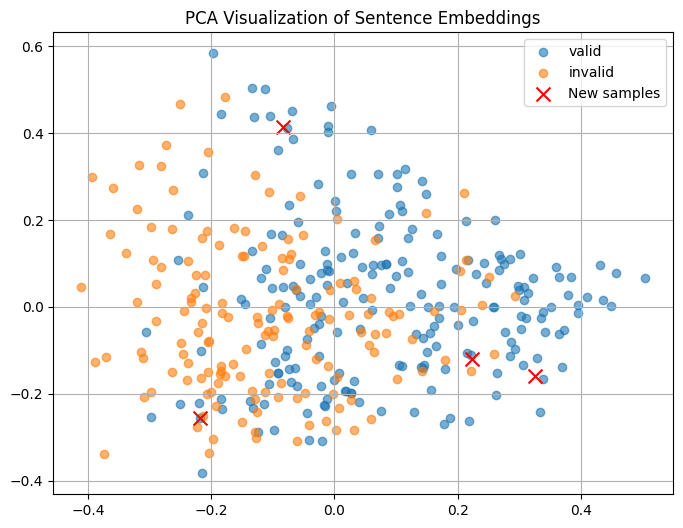

In [99]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Reduce to 2D
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(embed(sentences))
X_new = pca.transform(embed(new_sentences))

# Plot
y_array = np.array(labels)
plt.figure(figsize=(8, 6))
plt.scatter(X_reduced[y_array == 1, 0], X_reduced[y_array == 1, 1], label="valid", alpha=0.6)
plt.scatter(X_reduced[y_array == 0, 0], X_reduced[y_array == 0, 1], label="invalid", alpha=0.6)
plt.scatter(X_new[:, 0], X_new[:, 1], color='red', marker='x', s=100, label="New samples")
plt.legend()
plt.title("PCA Visualization of Sentence Embeddings")
plt.grid(True)
plt.show()


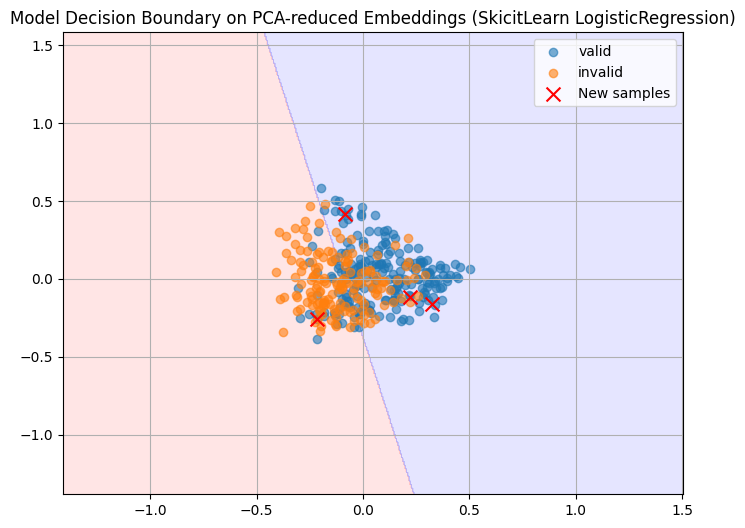

In [100]:
from matplotlib.colors import ListedColormap

# Create meshgrid
x_min, x_max = X_reduced[:, 0].min() - 1, X_reduced[:, 0].max() + 1
y_min, y_max = X_reduced[:, 1].min() - 1, X_reduced[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                     np.linspace(y_min, y_max, 500))

# Stack grid points and inverse PCA to original space
grid = np.c_[xx.ravel(), yy.ravel()]
grid_embed = pca.inverse_transform(grid)  # shape (N, 512)

# Predict with model
Z = model_sk.predict(grid_embed)
Z = Z.reshape(xx.shape)

# Plot
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=ListedColormap(['#FFAAAA', '#AAAAFF']))
plt.scatter(X_reduced[y_array == 1, 0], X_reduced[y_array == 1, 1], label="valid", alpha=0.6)
plt.scatter(X_reduced[y_array == 0, 0], X_reduced[y_array == 0, 1], label="invalid", alpha=0.6)
plt.scatter(X_new[:, 0], X_new[:, 1], color='red', marker='x', s=100, label="New samples")
plt.legend()
plt.title("Model Decision Boundary on PCA-reduced Embeddings (SkicitLearn LogisticRegression)")
plt.grid(True)
plt.show()


7813/7813 [==============================] - 10s 1ms/step


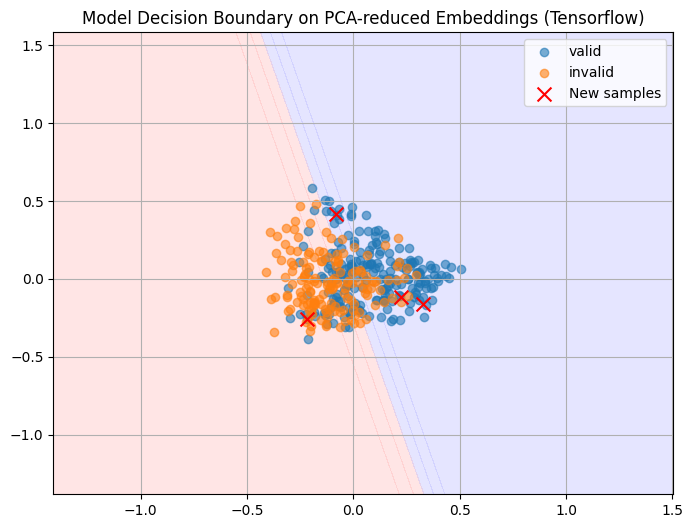

In [101]:
from matplotlib.colors import ListedColormap

# Create meshgrid
x_min, x_max = X_reduced[:, 0].min() - 1, X_reduced[:, 0].max() + 1
y_min, y_max = X_reduced[:, 1].min() - 1, X_reduced[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                     np.linspace(y_min, y_max, 500))

# Stack grid points and inverse PCA to original space
grid = np.c_[xx.ravel(), yy.ravel()]
grid_embed = pca.inverse_transform(grid)  # shape (N, 512)

# Predict with model
Z = model_tf.predict(grid_embed)
Z = Z.reshape(xx.shape)

# Plot
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=ListedColormap(['#FFAAAA', '#AAAAFF']))
plt.scatter(X_reduced[y_array == 1, 0], X_reduced[y_array == 1, 1], label="valid", alpha=0.6)
plt.scatter(X_reduced[y_array == 0, 0], X_reduced[y_array == 0, 1], label="invalid", alpha=0.6)
plt.scatter(X_new[:, 0], X_new[:, 1], color='red', marker='x', s=100, label="New samples")
plt.legend()
plt.title("Model Decision Boundary on PCA-reduced Embeddings (Tensorflow)")
plt.grid(True)
plt.show()


# Debug

In [102]:
import numpy as np
np.bincount(labels)

array([153, 209])

In [103]:
from sklearn.metrics.pairwise import cosine_similarity

print(cosine_similarity(embed(["Can you review my request?"]), embed(["Can you review my pull request?"])))

[[0.8844032]]


In [104]:
from sklearn.metrics.pairwise import cosine_similarity

# get top k similar sentence from the dataset
def top_similar(sent, sentence_list, label_list, label=0, top_k=5):
    sent_embed = embed([sent])
    ref_sents = [s for s, l in zip(sentence_list, label_list) if l == label]
    ref_embed = embed(ref_sents)
    sim = cosine_similarity(sent_embed, ref_embed)[0]
    idxs = np.argsort(sim)[-top_k:][::-1]
    top_k_result = [(ref_sents[i], sim[i]) for i in idxs]
    print(f"Top similar (label {label}) for '{sent}':")
    display(top_k_result)
    return top_k_result

top_similar("review pr", sentences, labels, 0)
top_similar("review pr", sentences, labels, 1)

feed = embed(["review pr"])

print(model_sk.classes_)



Top similar (label 0) for 'review pr':


[('Staging link', np.float32(0.50682056)),
 ('React component', np.float32(0.45122868)),
 ('README sections', np.float32(0.43119496)),
 ('Feature request', np.float32(0.42523414)),
 ('Permissions table', np.float32(0.42428708))]

Top similar (label 1) for 'review pr':


[('review pr', np.float32(1.0000001)),
 ('review pull request', np.float32(0.7387502)),
 ('review pull request', np.float32(0.7387502)),
 ('review design doc', np.float32(0.7183596)),
 ('review code', np.float32(0.6064117))]

[0 1]


In [105]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from collections import defaultdict

# test predictions using cosine similiarity

# Compute mean embedding per class
label_to_embeddings = defaultdict(list)

for emb, label in zip(embed(sentences), labels):
    label_to_embeddings[label].append(emb)

label_to_centroid = {label: np.mean(embs, axis=0) for label, embs in label_to_embeddings.items()}

# Embed new sentence
new_emb = embed(["saigo"])[0]

# Compute cosine similarity with each centroid
sims = {label: cosine_similarity([new_emb], [centroid])[0][0] for label, centroid in label_to_centroid.items()}

# Find the closest label
closest_label = max(sims, key=sims.get)

print("Closest label:", closest_label)
print("Similarity:", sims[closest_label])


Closest label: 0
Similarity: 0.4354339


In [106]:
## TODO
# implement the model to extract list o